#  Setup

In [1]:
def dropdbs():
    print('dropping databases: \n\n')
    for d in ['experiment', 'lab',]:
        try:
            schema = dj.schema('boazmohar_%s' % d, locals())
            schema.drop(force=True)
            print('dropping {d}'.format(d=d))
        except Exception as e:
            print('error dropping {d}: {e}'
                 .format(d=d, e=str(e)))
# dropdbs()

In [2]:
%matplotlib inline
import datajoint as dj
import numpy as np
import pandas as pd
dj.config['database.host'] = 'mesoscale-activity.datajoint.io'
dj.config['database.user'] = 'boazmohar'
dj.config['database.password'] = 'rodent-research'
dj.conn()

Connecting boazmohar@mesoscale-activity.datajoint.io:3306


DataJoint connection (connected) boazmohar@mesoscale-activity.datajoint.io:3306

In [ ]:
# dj.config['database.host'] = 'localhost'
# dj.config['database.user'] = 'root'
# dj.config['database.password'] = 'tutorial'


# Lab

## ERD

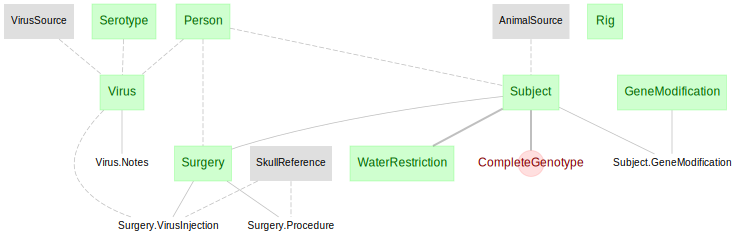

In [3]:
import lab
from lab import *
dj.ERD(lab)

## insert data

In [5]:
from lab import *

lab.Person().insert1(('boazmohar', 'Boaz Mohar'))

s = Subject()
s.insert1((394215, 'boazmohar', 123456, '2017-02-05', 'M', 'Jackson Labs'))
s.insert1((394220, 'boazmohar', 123456, '2017-02-05', 'F', 'Jackson Labs'))
s.insert1((394219, 'boazmohar', 123456, '2017-02-05', 'F', 'Jackson Labs'))
s.insert1((397353, 'boazmohar', 123456, '2017-06-06', 'M', 'Jackson Labs'))
s.insert1((397354, 'boazmohar', 123456, '2017-06-06', 'M', 'Jackson Labs'))
s.insert1((397357, 'boazmohar', 123456, '2017-06-06', 'F', 'Jackson Labs'))
s.insert1((388614, 'boazmohar', 123456, '2017-04-15', 'M', 'Jackson Labs'))

# 
wr = WaterRestriction()
wr.insert1((394215,70, 345678, '2017-01-01', 20.3))
wr.insert1((394220,71, 345678, '2017-01-01', 20.3))
wr.insert1((394219,72, 345678, '2017-01-01', 20.3))
wr.insert1((397353,73, 345678, '2017-01-01', 20.3))
wr.insert1((397354,74, 345678, '2017-01-01', 20.3))
wr.insert1((397357,75, 345678, '2017-01-01', 20.3))
wr.insert1((388614,76, 345678, '2017-01-01', 20.3))


se = Serotype()
se.insert([('AAV2/1',), ('SL1',),('Rabies',),('Adenovirus',),
           ('AAV9',),('AAV2/10',),('AAV8',),('AAV2/8',),('AAV2/5',),('AAV2/2',)])

v = Virus()
v.insert1((148, 'upenn', 'AAV2/1', 'boazmohar', 'GCAMP6f',1.3e13, '2018-01-08','good'))
v.insert1((137, 'upenn', 'AAV2/1', 'boazmohar','CRE',1.2e13, '2018-01-08','good'))
v.insert1((149, 'upenn', 'AAV2/1', 'boazmohar','GCAMP6s',1.3e13, '2018-01-08','good'))
v.insert1((111, 'janelia', 'AAV2/1', 'boazmohar','GCAMP7s',1.3e13, '2018-01-08','good'))

g = GeneModification()
g.insert([('Syt17-cre', ''), ('ACTB-tTa', ''), ('Chrna2-cre', ''), ('CamK2a-tTA', ''), ('TITL-GCaMP6f', '')], skip_duplicates=True)

s_gm = Subject.GeneModification()
s_gm.insert1((388614,'Chrna2-cre', 'Unknown', 'Unknown'))

lab.Rig().insert1(('2p_spine','2c.382', 'Two Photopn high NA'))

# Experiment

## ERD

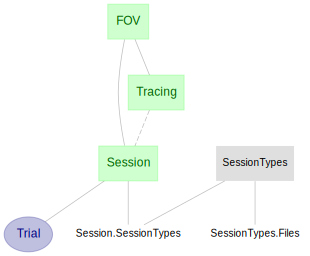

In [4]:
from experiment import *
import experiment
dj.ERD(experiment)

## insert data

### FOVs

In [6]:
fov = FOV()
#70 1
fov.insert1((394215, 1, '2017-07-29', 'One injections site, nice sparsity')) 
#72 1
fov.insert1((394219, 1, '2017-08-07', 'Left FOV with more cells., there is another one more to the right and down'))
#70 2
fov.insert1((394215, 2, '2017-09-02', 'Higher expression, same Location as fov1'))
#71 1
fov.insert1((394220, 1, '2017-07-30', 'Missing in google sheets'))
#72 2
fov.insert1((394219, 2, '2017-09-02', 'same area as FOV1'))
#73 1
fov.insert1((397353, 1, '2017-09-20', 'Lower injection ISO'))
#74 1
fov.insert1((397354, 1, '2017-09-20', 'ISO'))
#76 1
fov.insert1((388614, 1, '2017-10-03', 'ISO'))
#75 1
fov.insert1((397357, 1, '2017-10-03', 'ISO'))
#75 2
fov.insert1((397357, 2, '2017-10-24', 'ISO'))
#74 2
fov.insert1((397354, 2, '2017-10-26', 'ISO'))
#74 3
fov.insert1((397354, 3, '2017-12-06', 'ISO'))
#75 3
fov.insert1((397357, 3, '2018-01-03', 'ISO'))

### Session types

In [7]:
types = SessionTypes()
types.insert1(('Stack',))
types.insert1(('Spines',))
types.insert1(('Cellbodies',))
types.insert1(('Manual_mroi',))
types.insert1(('Vision',))

files = SessionTypes.Files()
files.insert1(('Spines','Sp.mat'))
files.insert1(('Cellbodies','Sp.mat'))
files.insert1(('Vision','vis*.p'))
files.insert1(('Vision','*.psyexp'))

### Tracings


In [9]:

t = Tracing()
t

subject_id institution 6 digit animal ID,fov_id,tracing_name name of reconstruction swc,tracing_type,"comments tuning, other remarks"


In [10]:
#wr70
t.insert1((394215, 1, 'cell_n1', 'Cell', 'None'))
t.insert1((394215, 1, 'Cell0', 'Cell','None'))
t.insert1((394215, 2, 'Cell13', 'Cell', 'None'))
t.insert1((394215, 2, 'Cell1', 'Cell', 'None'))

#wr71
t.insert1((394220, 1, 'Cell5', 'Cell', 'None'))
t.insert1((394220, 1, 'L5_Cell1', 'Cell', 'None'))
t.insert1((394220, 1, 'Cell2', 'Cell',  'Center ~ 0, 40; Best Ori 0'))

#wr72
t.insert1((394219, 1, 'Cell14', 'Cell', 'Center 10,-20'))

#wr73
t.insert1((397353, 1, 'Cell9', 'Cell', 'None'))

#wr74
t.insert1((397354, 1, 'Cell19',  'Cell', 'Center 0, -10; Ori 225'))
t.insert1((397354, 2, 'Cell5', 'Cell', 'Center 0, 0'))

#wr75
t.insert1((397357, 2, 'Cell7',  'Cell', 'Center -30, 40; Ori 135'))
t.insert1((397357, 3, 'Cell1', 'Cell', 'None'))

#wr76
t.insert1((388614, 1, 'cell6', 'Cell', 'None'))

### Sessions

In [13]:
import pandas as pd
import requests
import io
key='1ENbQe4QtUZ6as9y8Kcr_sHl3YpwQoAs_EScIIURefSQ'
gid='78168970'
response = requests.get('https://docs.google.com/spreadsheet/ccc?key=' + key + '&output=csv&gid=' + gid)
assert response.status_code == 200, 'Wrong status code'
f = io.StringIO(response.content.decode('utf-8'))
sessionsDF = pd.read_csv(f)

In [14]:
sessions = sessionsDF[sessionsDF.Use == 1.0]
sessions

,WR,Animal,Type,StartTime,Run,FOV,Cell,Branches,Divisions,Power,...,Switched,raw,sp,step5,database,prepared,dendrite,mask,time,Use
1,BMWR70,NaN,MROI,8/29/2017 10:20:00,2.0,1.0,Cell0,"1,2,5,3,6,7,9,8,19,20",NaN,35.0,...,NaN,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,1.0
4,BMWR70,NaN,MROI,8/28/2017 19:32:00,3.0,1.0,Cell0,"1,2,5,3,6,7,9,8,19,20",NaN,30.0,...,NaN,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,1.0
5,BMWR70,NaN,MROI,8/8/2017 19:02:00,1.0,1.0,cell_n1,"1,2,5,3,6,7,9,8,19,20",NaN,30.0,...,NaN,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,1.0
6,BMWR70,NaN,MROI,10/3/2017 19:45:00,4.0,2.0,Cell13,"13.2 15, 21, 22, 26",25.0,40.0,...,NaN,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,1.0
16,BMWR70,NaN,MROI,10/3/2017 19:30:00,3.0,2.0,Cell13,"13.2 15, 21, 22, 26",25.0,40.0,...,NaN,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,1.0
21,BMWR70,NaN,MROI,9/20/2017 15:30:00,4.0,2.0,Cell13,13.2\t18\t25\t23\t24\t27,25.0,40.0,...,NaN,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,1.0
22,BMWR70,NaN,MROI,9/20/2017 15:00:00,3.0,2.0,Cell13,13.2\t18\t25\t23\t24\t27,25.0,40.0,...,NaN,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,1.0
24,BMWR70,NaN,MROI,9/18/2017 15:45:00,5.0,2.0,Cell13,13.2\t18\t25\t23\t24\t27,25.0,40.0,...,NaN,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,1.0
25,BMWR70,NaN,MROI,9/18/2017 15:30:00,4.0,2.0,Cell13,13.2\t18\t25\t23\t24\t27,25.0,40.0,...,NaN,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,1.0
26,BMWR70,NaN,MROI,9/18/2017 15:00:00,3.0,2.0,Cell13,13.2\t18\t25\t23\t24\t27,25.0,40.0,...,NaN,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,1.0


In [15]:
from lab import WaterRestriction
WRs = sessions.WR.values
w = WaterRestriction()
ids = []
for wr_number in WRs:
    ids.append((w & 'water_restriction_number = %s' % wr_number[4:]).fetch1('subject_id'))
ids = np.array(ids)
ids

array([394215, 394215, 394215, 394215, 394215, 394215, 394215, 394215,
       394215, 394215, 394215, 394220, 394220, 394220, 394220, 394220,
       394220, 394220, 394219, 394219, 394219, 394219, 394219, 397353,
       397353, 397353, 397354, 397354, 397354, 397354, 397354, 397354,
       397354, 397354, 397357, 397357, 397357, 397357, 397357, 397357,
       388614, 388614], dtype=int64)

In [16]:
fovs = sessions.FOV.values.astype(int)
fovs

array([1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 3, 2, 2, 2, 2, 2, 1, 1])

In [17]:
session_ids = dict()
for animal in np.unique(ids):
    session_ids[animal] = 1
session_ids

{388614: 1, 394215: 1, 394219: 1, 394220: 1, 397353: 1, 397354: 1, 397357: 1}

In [20]:
Cells = sessions.Cell.values
t = Tracing()
t_ids = []
for cell, subject, fov in zip(Cells, ids, fovs):
    t_ids.append((t & 'tracing_name = "%s"' % cell & 'subject_id = %s' % subject).fetch1('tracing_name'))
t_ids = np.array(t_ids)
t_ids

array(['Cell0', 'Cell0', 'cell_n1', 'Cell13', 'Cell13', 'Cell13', 'Cell13',
       'Cell13', 'Cell13', 'Cell13', 'Cell1', 'Cell5', 'L5_Cell1',
       'L5_Cell1', 'L5_Cell1', 'L5_Cell1', 'L5_Cell1', 'Cell2', 'Cell14',
       'Cell14', 'Cell14', 'Cell14', 'Cell14', 'Cell9', 'Cell9', 'Cell9',
       'Cell5', 'Cell19', 'Cell19', 'Cell19', 'Cell19', 'Cell19', 'Cell19',
       'Cell19', 'Cell1', 'Cell7', 'Cell7', 'Cell7', 'Cell7', 'Cell7',
       'cell6', 'cell6'],
      dtype='<U8')

In [21]:
dates = pd.to_datetime(sessions.StartTime.values).strftime('%Y-%m-%d %H:%M:%S')
dates

array(['2017-08-29 10:20:00', '2017-08-28 19:32:00', '2017-08-08 19:02:00',
       '2017-10-03 19:45:00', '2017-10-03 19:30:00', '2017-09-20 15:30:00',
       '2017-09-20 15:00:00', '2017-09-18 15:45:00', '2017-09-18 15:30:00',
       '2017-09-18 15:00:00', '2017-09-07 10:00:00', '2017-08-15 16:00:00',
       '2017-08-15 16:00:00', '2017-08-15 16:00:00', '2017-08-08 15:50:00',
       '2017-08-07 16:20:00', '2017-08-03 17:35:00', '2017-08-02 16:30:00',
       '2017-08-21 18:20:00', '2017-08-11 17:40:00', '2017-08-11 16:40:00',
       '2017-08-10 17:40:00', '2017-08-10 16:40:00', '2017-10-24 15:30:00',
       '2017-10-23 15:50:00', '2017-10-23 15:30:00', '2017-12-07 10:30:00',
       '2017-11-08 15:30:00', '2017-11-08 15:00:00', '2017-11-07 15:30:00',
       '2017-11-07 15:00:00', '2017-10-28 11:50:00', '2017-10-26 15:50:00',
       '2017-10-26 15:30:00', '2018-01-07 14:30:00', '2017-12-29 13:50:00',
       '2017-12-28 15:50:00', '2017-12-27 15:50:00', '2017-11-09 16:50:00',
       '2017

In [22]:
runs = sessions.Run.values.astype(int)
runs

array([2, 3, 1, 4, 3, 4, 3, 5, 4, 3, 3, 4, 3, 2, 1, 1, 3, 5, 4, 2, 1, 2, 1,
       2, 3, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1])

In [23]:
powers = sessions.Power.values
powers

array([ 35.,  30.,  30.,  40.,  40.,  40.,  40.,  40.,  40.,  40.,  30.,
        45.,  40.,  25.,  25.,  25.,  25.,  30.,  30.,  30.,  30.,  30.,
        30.,  35.,  35.,  35.,  35.,  40.,  40.,  40.,  40.,  45.,  45.,
        45.,  60.,  55.,  55.,  55.,  30.,  30.,  50.,  50.])

In [24]:
comments = sessions.RunComments.values

In [25]:
anesthesia = []
for comment in comments:
    if comment is not np.nan and 'ISO' in comment:
        anesthesia.append('ISO')
    else:
        anesthesia.append('None')
anesthesia = np.array(anesthesia)
anesthesia

array(['None', 'ISO', 'None', 'None', 'None', 'ISO', 'ISO', 'None', 'None',
       'None', 'None', 'ISO', 'ISO', 'ISO', 'None', 'None', 'None', 'None',
       'ISO', 'None', 'None', 'None', 'None', 'None', 'ISO', 'ISO', 'ISO',
       'None', 'None', 'ISO', 'ISO', 'None', 'ISO', 'ISO', 'ISO', 'ISO',
       'ISO', 'ISO', 'ISO', 'ISO', 'ISO', 'ISO'],
      dtype='<U4')

In [26]:
notes = sessions.Notes.values
pitch = []
roll = []
for note in notes:
    note = note.replace(',', ' ')
    note = note.replace('  ', ' ')
    parts = note.split(sep=' ')
    pitch.append(float(parts[1]))
    roll.append(float(parts[3]))

In [29]:
session_ids

{388614: 1, 394215: 1, 394219: 1, 394220: 1, 397353: 1, 397354: 1, 397357: 1}

In [30]:
s = Session()
s

subject_id institution 6 digit animal ID,fov_id,session_id running session id,username,rig,tracing_name name of reconstruction swc,date start date and time,run run number,excitation_wavelength in nm,power in percent,anesthesia,pitch,roll,comments


In [31]:
for s_id, f_id, t_id, date, run, power, iso, p, r, coom in zip(ids, fovs, t_ids, dates, runs, powers, anesthesia, pitch, roll, comments):
    session_id = session_ids[s_id]
    if isinstance(coom, float) and np.isnan(coom):
        coom = 'None'
    s.insert1((s_id, f_id, session_id, 'boazmohar','2p_spine', t_id, date, run, 960, power, iso, p, r, coom), skip_duplicates=True)
    session_ids[s_id] = session_ids[s_id] + 1

In [32]:
s

subject_id institution 6 digit animal ID,fov_id,session_id running session id,username,rig,tracing_name name of reconstruction swc,date start date and time,run run number,excitation_wavelength in nm,power in percent,anesthesia,pitch,roll,comments
388614,1,1,boazmohar,2p_spine,cell6,2017-11-17 15:30:00,2,960,50.000,ISO,-4.200,-2.400,"RF single Ori 135 -30,40 center 20 distance, ISO, short!"
388614,1,2,boazmohar,2p_spine,cell6,2017-11-17 15:30:00,1,960,50.000,ISO,-4.200,-2.400,"ISO, Grating inter -35 -35"
394215,1,1,boazmohar,2p_spine,Cell0,2017-08-29 10:20:00,2,960,35.000,None,-4.300,-1.700,"Grating full,"
394215,1,2,boazmohar,2p_spine,Cell0,2017-08-28 19:32:00,3,960,30.000,ISO,-4.300,-1.700,"Grating full, 0.75ISO"
394215,1,3,boazmohar,2p_spine,cell_n1,2017-08-08 19:02:00,1,960,30.000,None,-4.300,-1.700,"might see a hotspot, low SNR"
394215,2,4,boazmohar,2p_spine,Cell13,2017-10-03 19:45:00,4,960,40.000,None,-4.500,-1.400,"RF single Ori 180 45, 0 center 30 distance Wierd motion ~ 1Hz mid field!, Hotspots"
394215,2,5,boazmohar,2p_spine,Cell13,2017-10-03 19:30:00,3,960,40.000,None,-4.500,-1.400,"RF single Ori 180 45, 0 center 30 distance Wierd motion ~ 1Hz mid field!, Hotspots"
